# 1. Descriptive Statistics
**Descriptive statistics summarize the main features of a dataset. Common measures include mean, median, mode, variance, standard deviation, and range.**

Mean: 65400.0
Median: 62000.0
Mode: 50000
Standard Deviation: 12074.767078498864
Variance: 145800000.0
Minimum: 50000
Maximum: 80000
Range: 30000
             age        salary
count   5.000000      5.000000
mean   28.400000  65400.000000
std     4.774935  12074.767078
min    23.000000  50000.000000
25%    25.000000  60000.000000
50%    28.000000  62000.000000
75%    31.000000  75000.000000
max    35.000000  80000.000000


<Axes: >

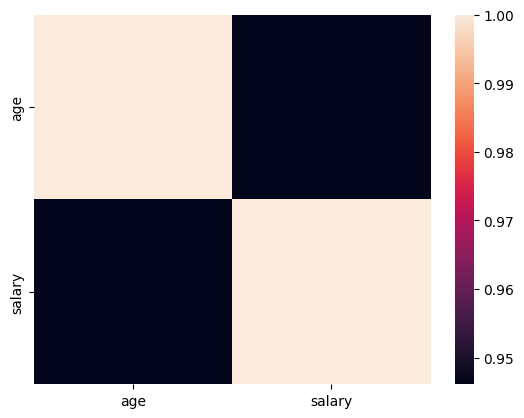

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson
from scipy import stats


# Example dataframe
df = pd.DataFrame({
    'age': [23, 25, 31, 35, 28],
    'salary': [50000, 62000, 75000, 80000, 60000]
})

# Descriptive Statistics
mean = df['salary'].mean()  # Mean
print(f"Mean: {mean}")
median = df['salary'].median()  # Median
print(f"Median: {median}")
mode = df['salary'].mode()  # Mode
print(f"Mode: {mode.iloc[0]}")  # Returns a series and taking the first mode
std = df['salary'].std()  # Standard Deviation
print(f"Standard Deviation: {std}")
var = df['salary'].var()  # Variance
print(f"Variance: {var}")
min_value = df['salary'].min()  # Minimum
print(f"Minimum: {min_value}")
max_value = df['salary'].max()  # Maximum
print(f"Maximum: {max_value}")
range_value = max_value - min_value  # Range
print(f"Range: {range_value}")

# Or call describe function 
# Summary statistics
summary = df.describe()
print(summary)

# Correlation and Covariance
corr = df.corr()  # Correlation matrix
cov = df.cov()  # Covariance matrix

# Plot
sns.heatmap(df.corr())
#sns.heatmap(df.cov())

# 2. Probability Distributions
**Probability distributions describe how the values of a variable are distributed. Common distributions include normal (Gaussian), binomial, and Poisson.**

**Probability Density Function (PDF) vs Cumulative Distribution Function (CDF)**

**What they represent:**

* PDF is like a "likelihood map" for possible outcomes in a continuous distribution. Defines the probability that some outcome will occur.
* CDF is a probability scoreboard that keeps a running total. It answers the question:"What's the chance of getting this value or less?".

**Shape and interpretation:**

* PDF displays the shape of the distribution, with peaks showing more likely values.
* CDF is always increasing, showing accumulated probability as the value increases.

**Calculation:**

* For continuous distributions, the CDF is the integral of the PDF.
* The PDF is the derivative of the CDF.

**Range of values:**

* PDF can have values greater than 1, but the area under the curve always equals 1.
* CDF always ranges from 0 to 1, representing probabilities.

**Usage:**

* PDF is useful for visualizing the distribution shape and finding relative likelihoods.
* CDF is better for finding probabilities of ranges and percentiles.

**Direct probability interpretation:**

* PDF values are not directly interpretable as probabilities for continuous distributions.
* CDF values directly give probabilities.

**Applicability:**

* PDF is primarily used for continuous distributions.
* CDF can be used for both discrete and continuous distributions.

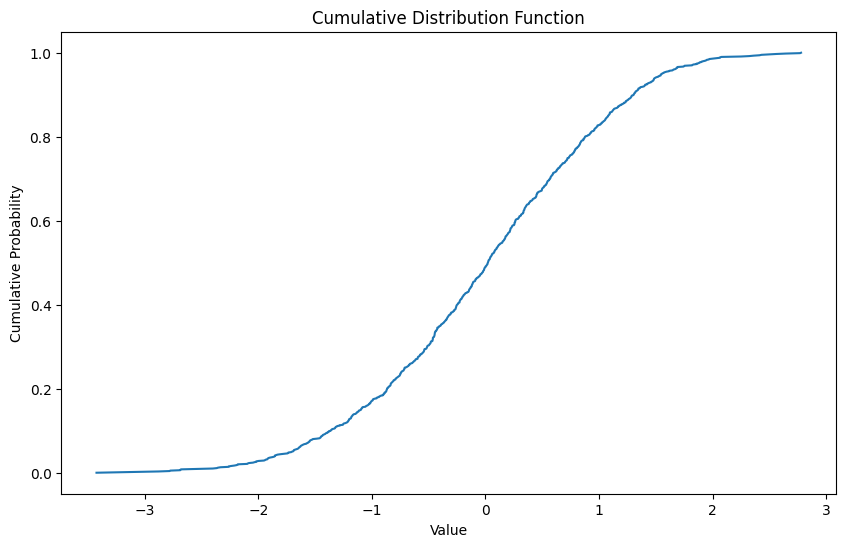

In [2]:
# Generate normal distribution data
normal_dist = np.random.normal(loc=0, scale=1, size=1000)

sorted_data = np.sort(normal_dist)
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cumulative_prob)
plt.title("Cumulative Distribution Function")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.show()

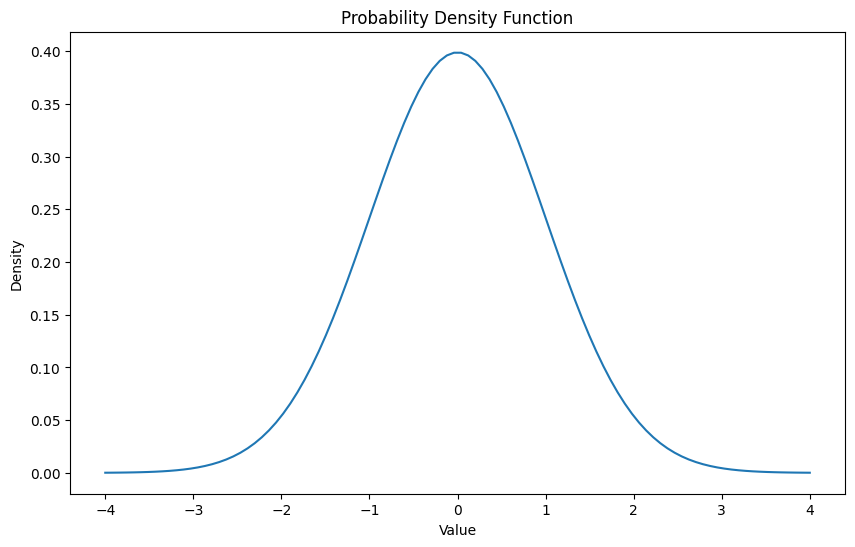

In [3]:
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf)
plt.title("Probability Density Function")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

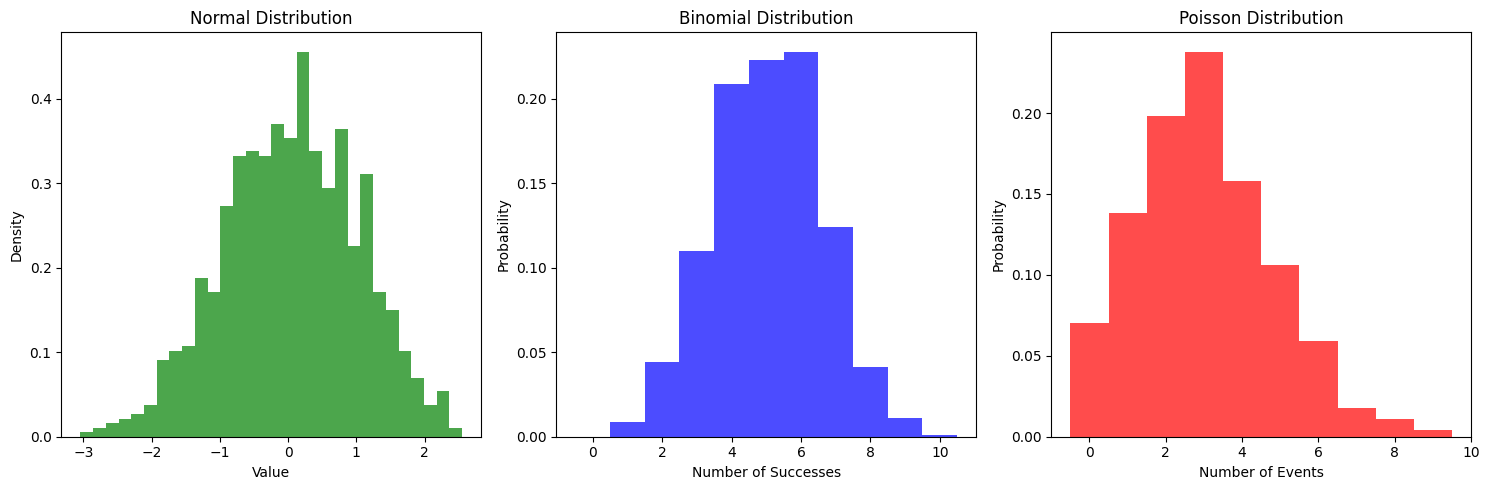

In [4]:
# Generate distributions 
normal_dist = norm.rvs(size=1000, loc=0, scale=1)
binomial_dist = binom.rvs(n=10, p=0.5, size=1000)
poisson_dist = poisson.rvs(mu=3, size=1000)

# Plotting
plt.figure(figsize=(15, 5))

# Normal Distribution Plot
plt.subplot(1, 3, 1)
plt.hist(normal_dist, bins=30, density=True, alpha=0.7, color='g')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Binomial Distribution Plot
plt.subplot(1, 3, 2)
plt.hist(binomial_dist, bins=np.arange(-0.5, 11.5, 1), density=True, alpha=0.7, color='b')
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

# Poisson Distribution Plot
plt.subplot(1, 3, 3)
plt.hist(poisson_dist, bins=np.arange(-0.5, max(poisson_dist)+1.5, 1), density=True, alpha=0.7, color='r')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# 3. Confidence Intervals
**Confidence intervals give a range in which the true population parameter is likely to lie with a given level of confidence (e.g., 95%).**

The *width of the confidence interval* is influenced by:
* **Sample size:** Larger samples generally lead to narrower intervals.
* **Variability in the data:** More variable data results in wider intervals.
* **Confidence level:** Higher confidence levels (e.g., 99% vs. 95%) lead to wider intervals.

**Repeated Sampling:** If we were to repeat this sampling process many times, about 95% of the calculated intervals would contain the true population mean.

**Not About Individual Samples:** The 95% confidence doesn't apply to this specific interval, but to the method of calculating the interval.

**Uncertainty Representation:** The interval visually represents the uncertainty in our estimate of the population mean.

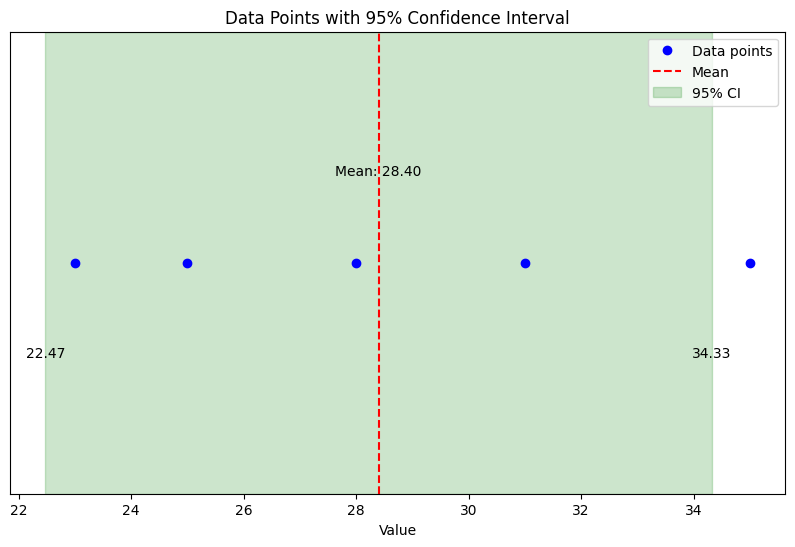

In [5]:
import scipy.stats as stats


# Sample data
data = np.array([23, 25, 31, 35, 28])
confidence = 0.95

# Mean and standard error of the mean
mean = np.mean(data)
sem = stats.sem(data)

# Confidence interval
confidence_interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=sem)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.plot(data, np.zeros_like(data), 'o', color='blue', label='Data points')

# Plot the mean
ax.axvline(mean, color='red', linestyle='--', label='Mean')

# Plot the confidence interval
ax.axvspan(confidence_interval[0], confidence_interval[1], alpha=0.2, color='green', label='95% CI')

# Set labels and title
ax.set_yticks([])
ax.set_xlabel('Value')
ax.set_title('Data Points with 95% Confidence Interval')

# Add legend
ax.legend()

# Add text annotations
ax.text(mean, 0.02, f'Mean: {mean:.2f}', ha='center', va='bottom')
ax.text(confidence_interval[0], -0.02, f'{confidence_interval[0]:.2f}', ha='center', va='top')
ax.text(confidence_interval[1], -0.02, f'{confidence_interval[1]:.2f}', ha='center', va='top')

plt.show()

# 4. Hypothesis Testing and T-Tests
**Hypothesis testing helps in determining whether a sample data supports a given hypothesis. The T-test checks whether the means of two groups are statistically different.**

* **One-sample T-test: Tests if the sample mean is equal to a population mean.(One Categorical)**

In [6]:
# One-sample t-test
t_stat, p_value = stats.ttest_1samp(data, popmean=30)  # Test if mean of data = 30

* **Two-sample T-test: Tests if the means of two independent groups are different.**

In [7]:
# Two-sample t-test
group1 = [23, 25, 31, 35, 28]
group2 = [22, 29, 32, 30, 27]
t_stat, p_value = stats.ttest_ind(group1, group2)


* **Paired T-test: Tests if the means of two related groups are different.**

In [8]:
# Paired t-test
before = [80, 75, 85, 90, 70]
after = [82, 78, 85, 95, 72]
t_stat, p_value = stats.ttest_rel(before, after)


# 5. Chi-Squared Test
**The Chi-Squared test assesses the association between categorical variables in a contingency table (observed vs. expected frequencies).**

**Hypotheses:**

***Null Hypothesis (H₀): The two categorical variables are independent (i.e., no association).***

***Alternative Hypothesis (H₁): The two categorical variables are dependent (i.e., there is an association).***

In [9]:
from scipy.stats import chi2_contingency

# Contingency table (observed frequencies)
observed = [[10, 20, 30], [6, 9, 17]]

# Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(observed)


# 6. General Hypothesis Testing Framework
**In hypothesis testing:**

* **Null Hypothesis (H0): Assumes no effect or difference.**

* **Alternative Hypothesis (H1): Assumes there is an effect or difference.**

* **P-value: Helps in deciding whether to reject the null hypothesis.**

* **Reject H0 if p_value < alpha (usually 0.05).**

# 7. Critical Values for T-Test
**Critical values help determine the rejection region for the null hypothesis based on a given confidence level.**

In [10]:
# Critical t-value for a two-tailed test at 95% confidence and df=10
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df=10)

# 8. One-Way ANOVA (Analysis of Variance):
**Purpose:** *One-way ANOVA is used to determine if there are statistically significant differences between the means of three or more independent groups.*

**When to Use:** *You use ANOVA when you want to test whether the means of several groups are equal. It checks for overall differences across all groups, but it doesn’t tell you which specific groups differ from each other.*

**How it Works:** *It compares the variability within groups to the variability between groups. If the variability between groups is significantly larger than the variability within groups, it suggests that there are differences between the groups.*

**Limitations:** *One-way ANOVA only tells you that there is at least one significant difference between the groups, but it doesn’t specify which groups differ.*

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
One-Way ANOVA Table:
              sum_sq     df         F    PR(>F)
day         9.525873    3.0  1.672355  0.173589
Residual  455.686604  240.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Fri    Sat   0.2584 0.8806 -0.6444 1.1611  False
   Fri    Sun   0.5204 0.4558  -0.394 1.4348  False
   Fri   Thur   0.0367 0.9996 -0.8981 0.9715  False
   Sat    Sun    0.262 0.6204 -0.2977 0.8217  False
   Sat   Thur  -0.2217 0.7679 -0.8141 0.3708  False
   Sun   Thur  -0.4837 0.1724 -1.0938 0.1264  False
-------------------------------------------

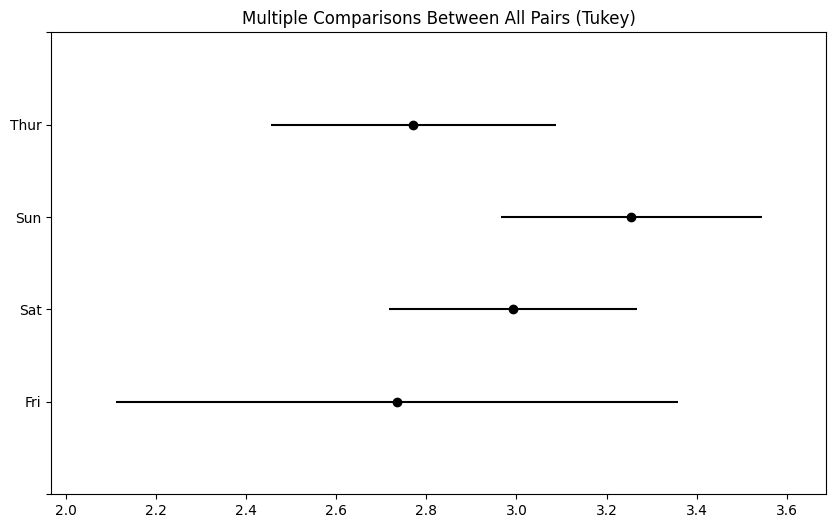

In [11]:
# Importing necessary libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns


# Load a sample dataset from seaborn (e.g., "tips" dataset)
# This dataset contains information about tips received at a restaurant.
df = sns.load_dataset('tips')

# Display the first few rows to understand the structure
print(df.head())

# One-way ANOVA: Does the mean tip vary by day?
# Null hypothesis: The mean tip is the same across all days.
# Alternative hypothesis: At least one day has a different mean tip.

# Step 1: Define the model
# We use the formula tip ~ day to indicate that we are checking how tip 
# (the dependent variable) varies by day (the independent variable).
model = ols('tip ~ day', data=df).fit()

# Step 2: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Table:")
print(anova_table)

# Interpretation: Check the p-value in the ANOVA table to see if there's a significant difference.
# If p < 0.05, reject the null hypothesis (there is a significant difference in tips across the days).

# Step 3: Tukey's HSD Test to identify which days differ significantly
tukey = pairwise_tukeyhsd(df['tip'], df['day'], alpha=0.05)
print(tukey)

# Step 4: Plot the results for better visualization
tukey.plot_simultaneous()
plt.show()


# 9. Two-Way ANOVA with Interaction and Tukey's Test

A two-way ANOVA examines how two independent variables affect a dependent variable and also tests for interaction effects.

In [12]:
# Two-way ANOVA: Does the mean tip vary by both day and time (lunch or dinner)?
# Null hypothesis: The mean tip is the same across all combinations of day and time.
# Alternative hypothesis: There are differences in mean tips across day, time, or their interaction.

# Step 1: Define the model (with interaction term day*time)
model = ols('tip ~ day * time', data=df).fit()

# Step 2: Perform Two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-Way ANOVA Table:")
print(anova_table)

# Interpretation: Check the p-values for both the main effects (day, time) and the interaction term (day:time).
# Significant p-values (< 0.05) indicate that these factors (or their combination) affect the dependent variable (tip).

# Step 3: Tukey's Test for pairwise comparisons (for 'day')
tukey_day = pairwise_tukeyhsd(df['tip'], df['day'], alpha=0.05)
print("Tukey's Test for 'day':")
print(tukey_day)

# Optional: Tukey's Test for pairwise comparisons (for 'time')
#tukey_time = pairwise_tukeyhsd(df['tip'], df['time'], alpha=0.05)
#print("Tukey's Test for 'time':")
#print(tukey_time)


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


Two-Way ANOVA Table:
              sum_sq     df         F    PR(>F)
day         1.639527    3.0  0.286331  0.751272
time        6.544119    1.0  3.428645  0.065313
day:time    2.976109    3.0  0.519755  0.669079
Residual  454.261182  238.0       NaN       NaN
Tukey's Test for 'day':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Fri    Sat   0.2584 0.8806 -0.6444 1.1611  False
   Fri    Sun   0.5204 0.4558  -0.394 1.4348  False
   Fri   Thur   0.0367 0.9996 -0.8981 0.9715  False
   Sat    Sun    0.262 0.6204 -0.2977 0.8217  False
   Sat   Thur  -0.2217 0.7679 -0.8141 0.3708  False
   Sun   Thur  -0.4837 0.1724 -1.0938 0.1264  False
---------------------------------------------------


# 10. Tukey's Test (Tukey's HSD):
**Purpose:** *Tukey’s test is a post-hoc test, meaning it is applied after you find a significant result from ANOVA. It is used to determine exactly which groups differ from each other by comparing all pairs of group means.*

**When to Use:** *You apply Tukey’s test when the ANOVA shows that there is a significant difference between group means, and you want to pinpoint the exact differences between specific pairs of groups.*

**How it Works:** *Tukey's test calculates a confidence interval for the difference between each pair of group means. If the confidence interval does not contain zero, it indicates a significant difference between the groups.*

**Result:** *Tukey’s test identifies specific pairs of groups where the means differ significantly, allowing for more detailed insights than ANOVA alone.*

# Interpreting Classification Reports:

* **Precision** → "How many selected items are relevant?"
* **Recall** → "How many relevant items are selected?"
* **F1-Score** → "Balance between precision and recall."
* **Accuracy** → "How often is the model correct?"